<a href="https://colab.research.google.com/github/eric-pding/RSM8413_Group_Assignments/blob/main/RSM8413_Group_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RSM8413: Group Assignment 4

## PART I

### 1. Preliminary Data Cleaning

In [2]:
from sklearn.cluster import KMeans
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading in the Dataset
train = 'https://raw.githubusercontent.com/eric-pding/RSM8413_Group_Assignments/main/CensusCanada2021Training.csv'
test = 'https://raw.githubusercontent.com/eric-pding/RSM8413_Group_Assignments/main/CensusCanada2021Test.csv'

data_train = pd.read_csv(train)
data_test = pd.read_csv(test)

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5371 entries, 0 to 5370
Data columns (total 18 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Total Population                                                           5371 non-null   int64  
 1   Total Households                                                           5297 non-null   float64
 2   Median Household Income (Current Year $)                                   5245 non-null   float64
 3   Total Households For Period Of Construction                                5297 non-null   float64
 4   Total Households For Period Of Construction Built Before 1961              5297 non-null   float64
 5   Total Households For Period Of Construction Built Between 1961 And 1980    5297 non-null   float64
 6   Total Households For Period Of Construction Built Betwee

In [6]:
data_train.head()

,Total Population,Total Households,Median Household Income (Current Year $),Total Households For Period Of Construction,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built Between 2006 And 2010,Total Households For Period Of Construction Built Between 2011 And 2015,Total Households For Period Of Construction Built Between 2016 And 2021,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter
0,3088,1235.0,107000.0,1235.0,25.0,1130.0,50.0,15.0,10.0,10.0,0.0,0.0,1135,130,0,1235.0,1055.0,180.0
1,5889,1665.0,111000.0,1665.0,0.0,0.0,0.0,15.0,20.0,375.0,315.0,935.0,1605,50,10,1665.0,1365.0,300.0
2,8090,2775.0,105000.0,2775.0,105.0,150.0,240.0,1210.0,555.0,165.0,240.0,120.0,2375,400,0,2775.0,2360.0,420.0
3,4074,1775.0,65000.0,1775.0,210.0,1100.0,260.0,85.0,35.0,45.0,30.0,15.0,1265,275,235,1775.0,1375.0,400.0
4,3642,1385.0,101000.0,1385.0,10.0,190.0,1010.0,165.0,0.0,0.0,10.0,0.0,1035,325,25,1385.0,1250.0,140.0


**Insights from the Dataset**


*   Missing Values in many of the columns (5371 in total but most had 5297)
*   Naming of the column (Total Households For Period Of Construction Built Between 1981 And 190)?
*   There is a column named "Tenure Renter" in the excel file that has no entries; however, when loading the data, it is not in the dataset




In [7]:
# Renaming the Misnamed Column
data_train.rename(columns= {"Total Households For Period Of Construction Built Between 1981 And 190":
                            "Total Households For Period Of Construction Built Between 1981 And 1990"}, inplace = True)
data_test.rename(columns= {"Total Households For Period Of Construction Built Between 1981 And 190":
                            "Total Households For Period Of Construction Built Between 1981 And 1990"}, inplace = True)

data_train.head()

,Total Population,Total Households,Median Household Income (Current Year $),Total Households For Period Of Construction,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 1990,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built Between 2006 And 2010,Total Households For Period Of Construction Built Between 2011 And 2015,Total Households For Period Of Construction Built Between 2016 And 2021,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter
0,3088,1235.0,107000.0,1235.0,25.0,1130.0,50.0,15.0,10.0,10.0,0.0,0.0,1135,130,0,1235.0,1055.0,180.0
1,5889,1665.0,111000.0,1665.0,0.0,0.0,0.0,15.0,20.0,375.0,315.0,935.0,1605,50,10,1665.0,1365.0,300.0
2,8090,2775.0,105000.0,2775.0,105.0,150.0,240.0,1210.0,555.0,165.0,240.0,120.0,2375,400,0,2775.0,2360.0,420.0
3,4074,1775.0,65000.0,1775.0,210.0,1100.0,260.0,85.0,35.0,45.0,30.0,15.0,1265,275,235,1775.0,1375.0,400.0
4,3642,1385.0,101000.0,1385.0,10.0,190.0,1010.0,165.0,0.0,0.0,10.0,0.0,1035,325,25,1385.0,1250.0,140.0


In [8]:
# Dropping rows with mostly empty values (threshold set to 80%)
threshold = 0.8
data_train.dropna(thresh=threshold*len(data_train.columns), inplace = True)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5297 entries, 0 to 5370
Data columns (total 18 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Total Population                                                           5297 non-null   int64  
 1   Total Households                                                           5297 non-null   float64
 2   Median Household Income (Current Year $)                                   5245 non-null   float64
 3   Total Households For Period Of Construction                                5297 non-null   float64
 4   Total Households For Period Of Construction Built Before 1961              5297 non-null   float64
 5   Total Households For Period Of Construction Built Between 1961 And 1980    5297 non-null   float64
 6   Total Households For Period Of Construction Built Betwee

Now, there only remains 52 observations with missing data for the variable **Median Household Income**. We will also remove these observations as:


1.   The missing data only accounts for 1% of the total data, so dropping them will not introduce bias into our model.
2.   Since **Median Household Income** is our response variable, it is inappropriate to just imput numbers into the missing cells as it could potentially affect our final result. Therefore, removing it would be the best next alternative.



In [15]:
data_train.dropna(subset = ["Median Household Income (Current Year $)"], inplace = True)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5245 entries, 0 to 5370
Data columns (total 18 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Total Population                                                           5245 non-null   int64  
 1   Total Households                                                           5245 non-null   float64
 2   Median Household Income (Current Year $)                                   5245 non-null   float64
 3   Total Households For Period Of Construction                                5245 non-null   float64
 4   Total Households For Period Of Construction Built Before 1961              5245 non-null   float64
 5   Total Households For Period Of Construction Built Between 1961 And 1980    5245 non-null   float64
 6   Total Households For Period Of Construction Built Betwee

In [16]:
data_train.head()

,Total Population,Total Households,Median Household Income (Current Year $),Total Households For Period Of Construction,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 1990,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built Between 2006 And 2010,Total Households For Period Of Construction Built Between 2011 And 2015,Total Households For Period Of Construction Built Between 2016 And 2021,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter
0,3088,1235.0,107000.0,1235.0,25.0,1130.0,50.0,15.0,10.0,10.0,0.0,0.0,1135,130,0,1235.0,1055.0,180.0
1,5889,1665.0,111000.0,1665.0,0.0,0.0,0.0,15.0,20.0,375.0,315.0,935.0,1605,50,10,1665.0,1365.0,300.0
2,8090,2775.0,105000.0,2775.0,105.0,150.0,240.0,1210.0,555.0,165.0,240.0,120.0,2375,400,0,2775.0,2360.0,420.0
3,4074,1775.0,65000.0,1775.0,210.0,1100.0,260.0,85.0,35.0,45.0,30.0,15.0,1265,275,235,1775.0,1375.0,400.0
4,3642,1385.0,101000.0,1385.0,10.0,190.0,1010.0,165.0,0.0,0.0,10.0,0.0,1035,325,25,1385.0,1250.0,140.0


### 2. EDA

In [14]:
!pip install sweetviz
import sweetviz as sv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 59.0 MB/s eta 0:00:00


In [17]:
#Generate an EDA using the Sweetviz Package
analyze_report = sv.analyze(data_train, "Median Household Income (Current Year $)")

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



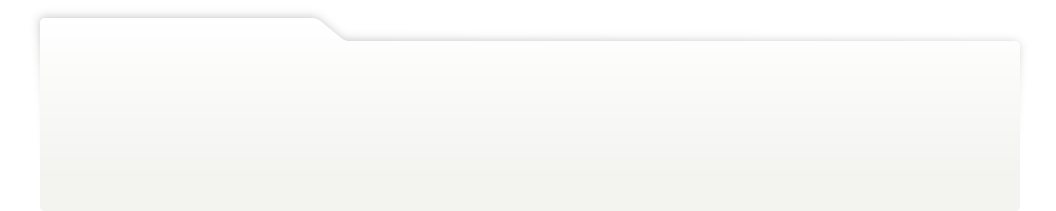
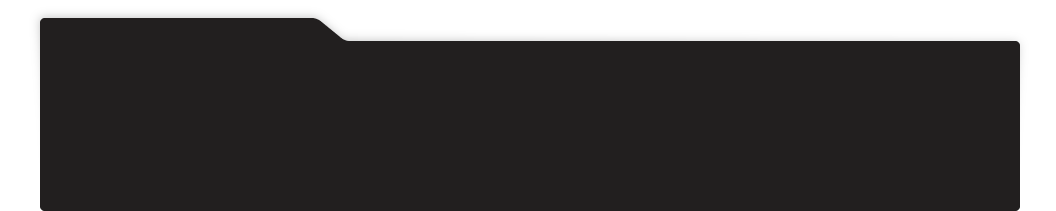
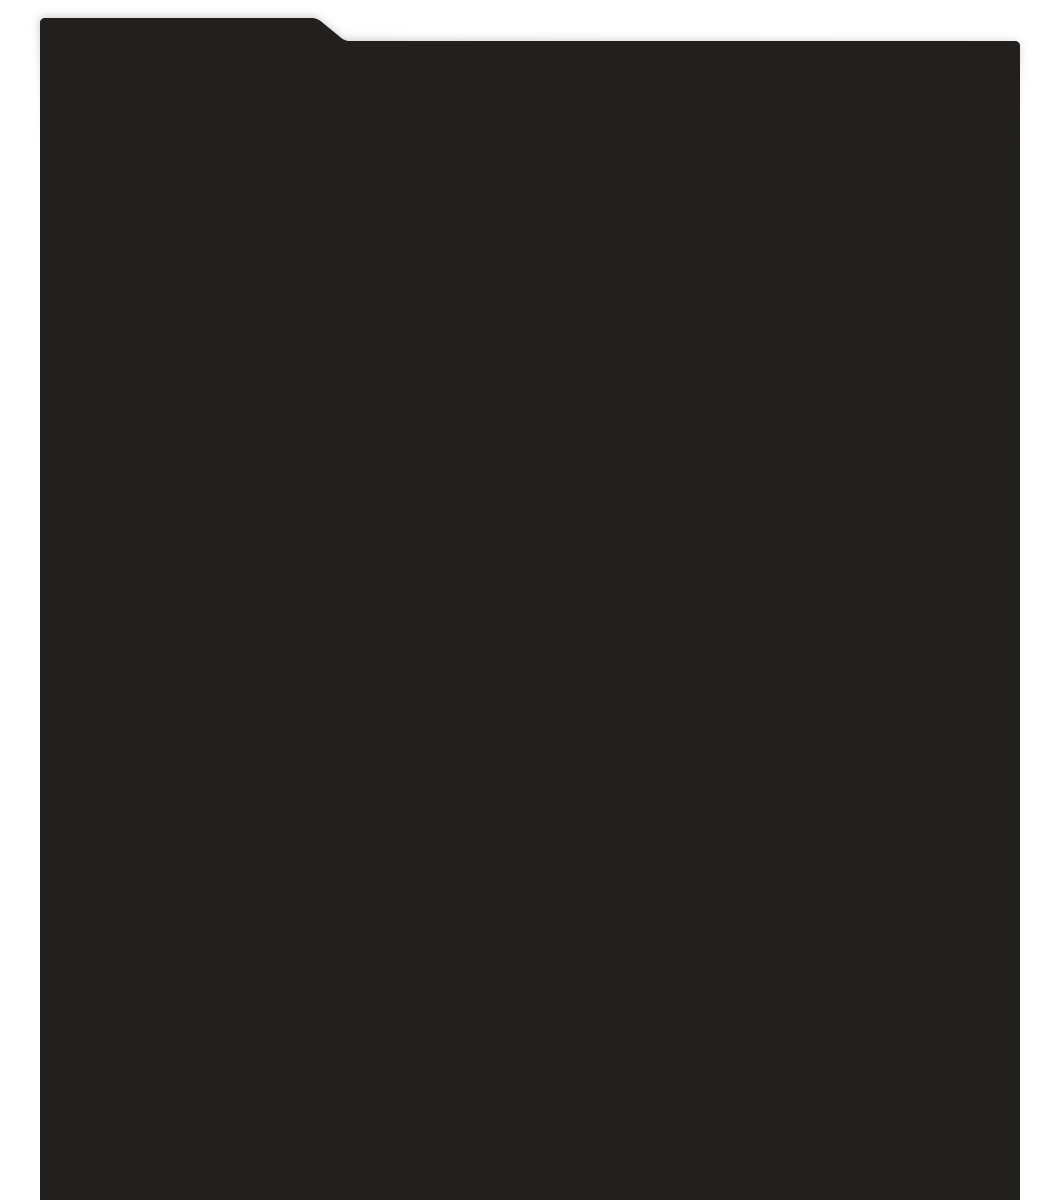
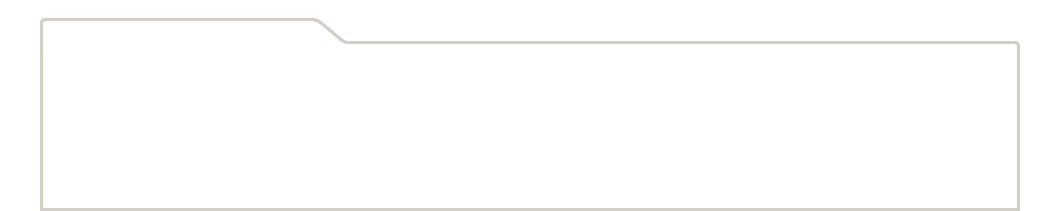
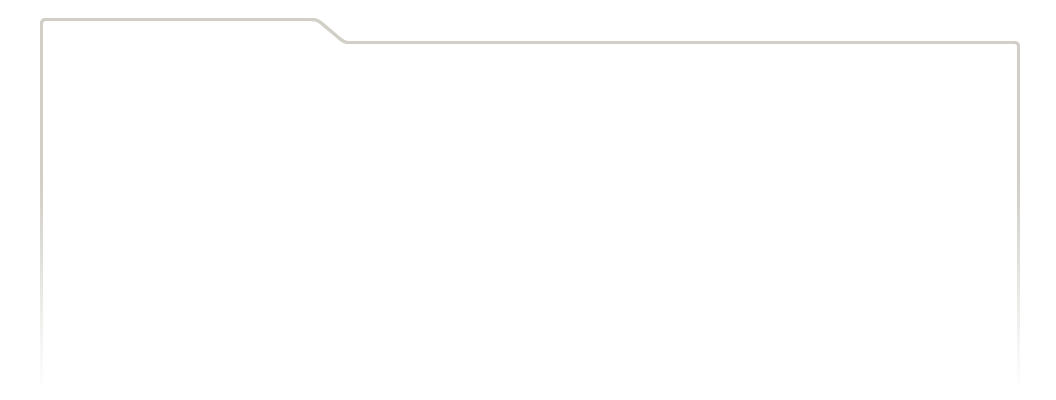
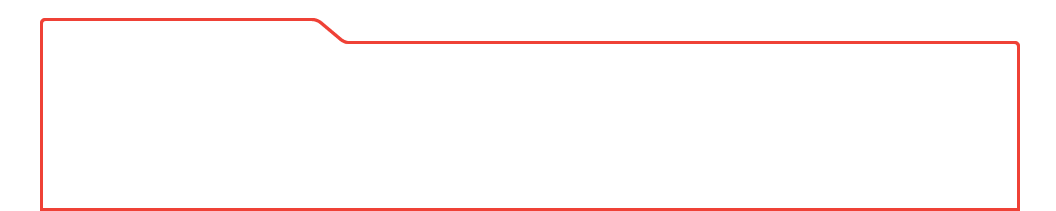
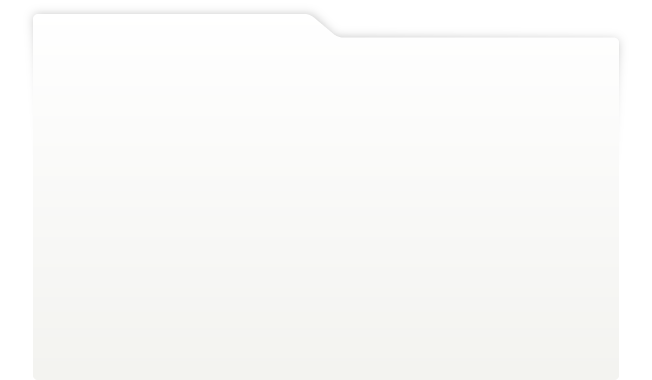
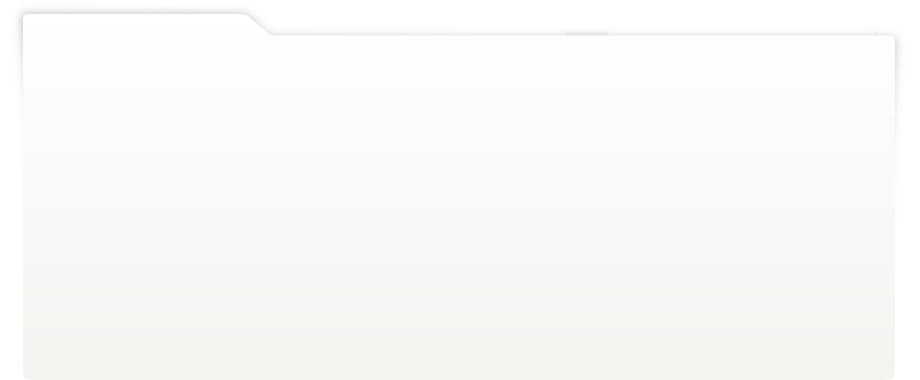
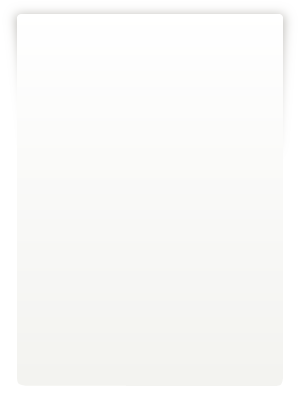
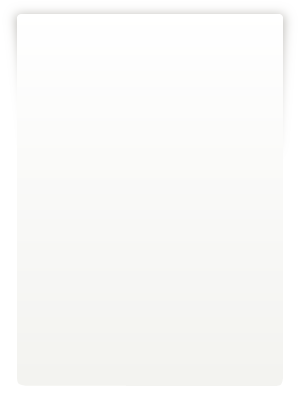
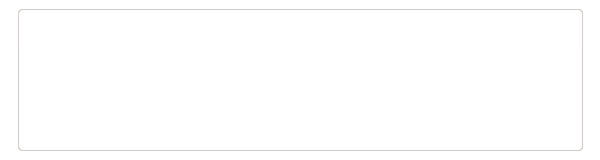
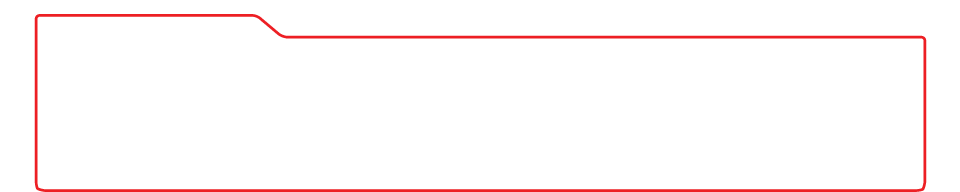
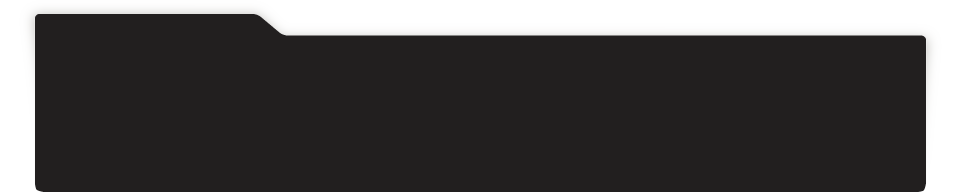
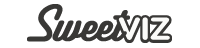
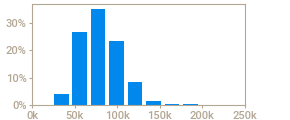
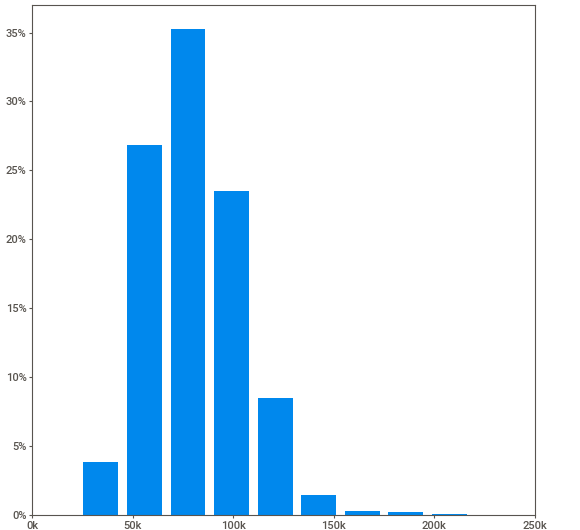
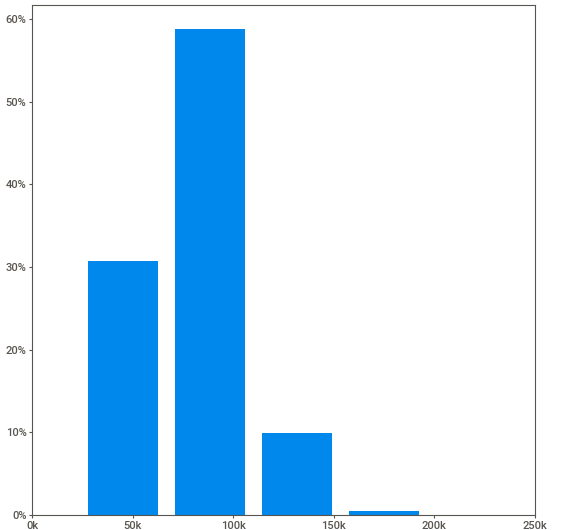
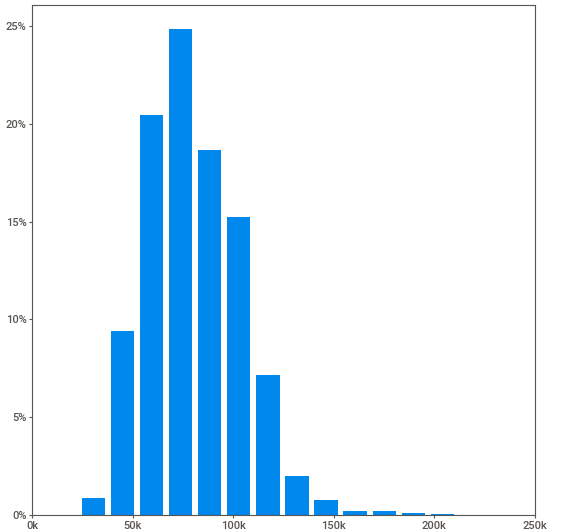
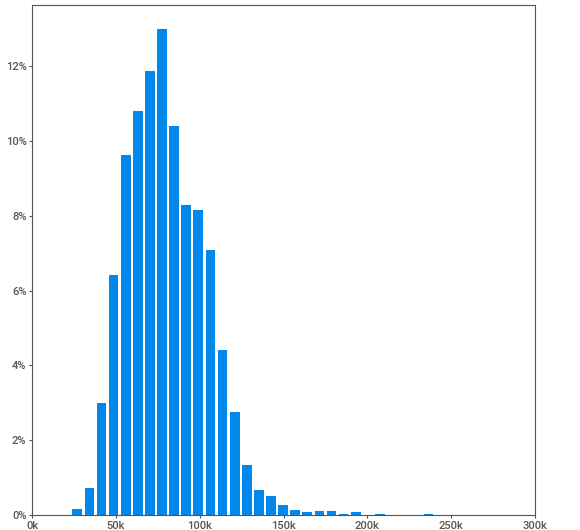
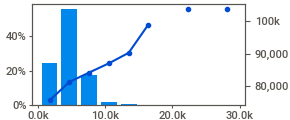
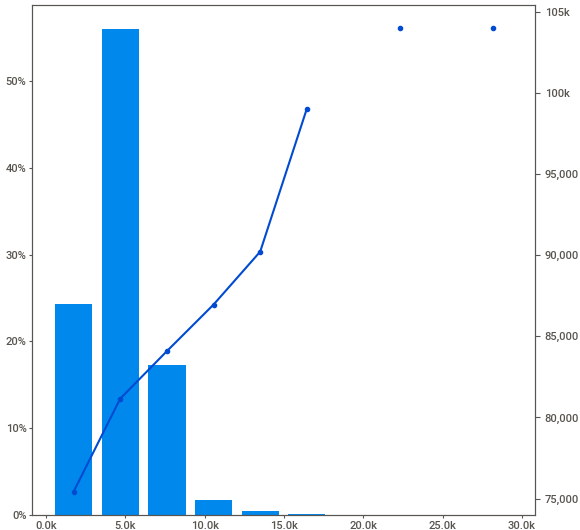
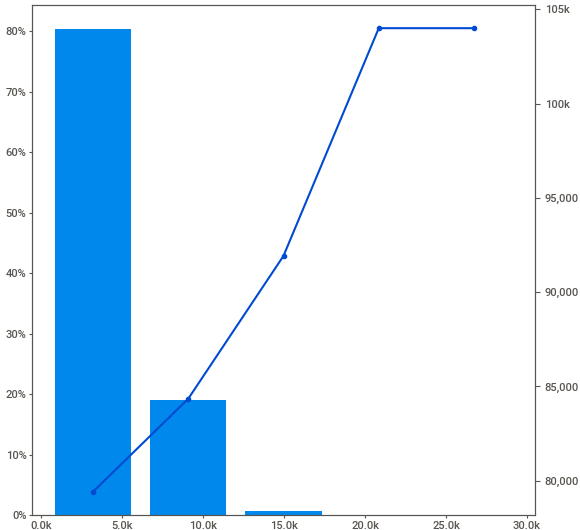
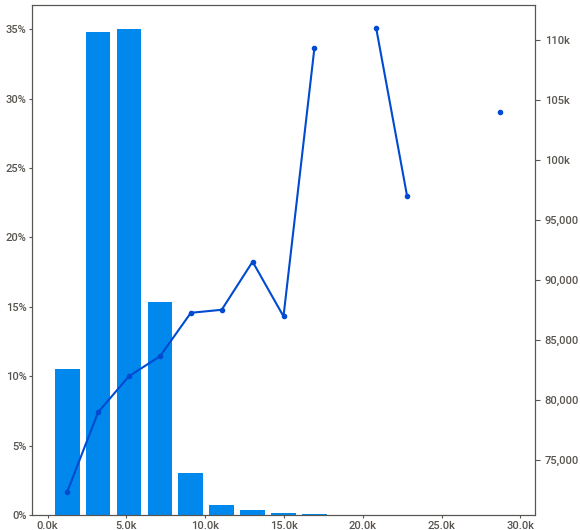
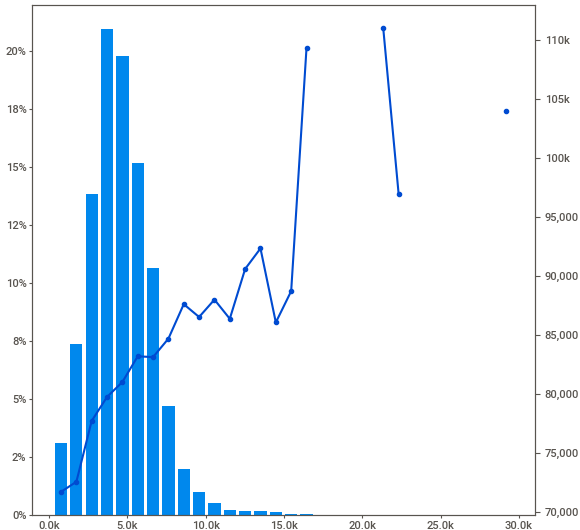
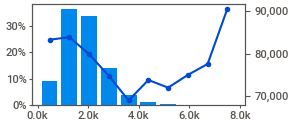
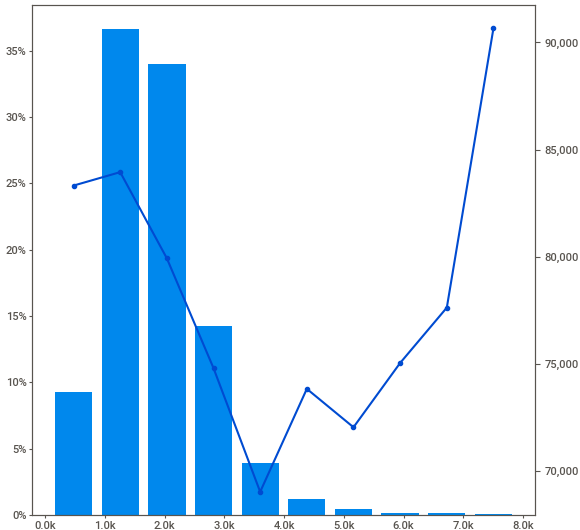
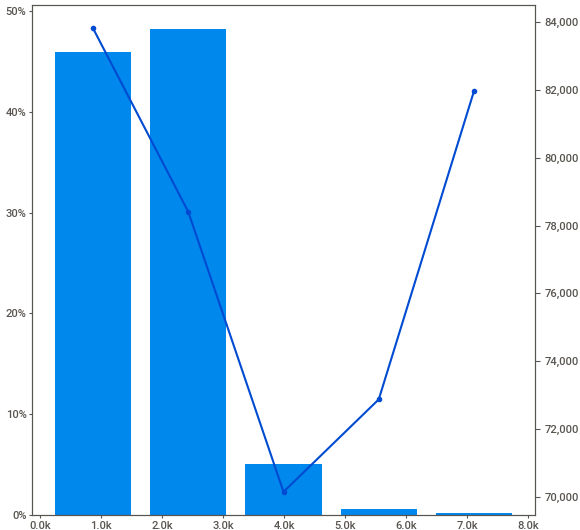
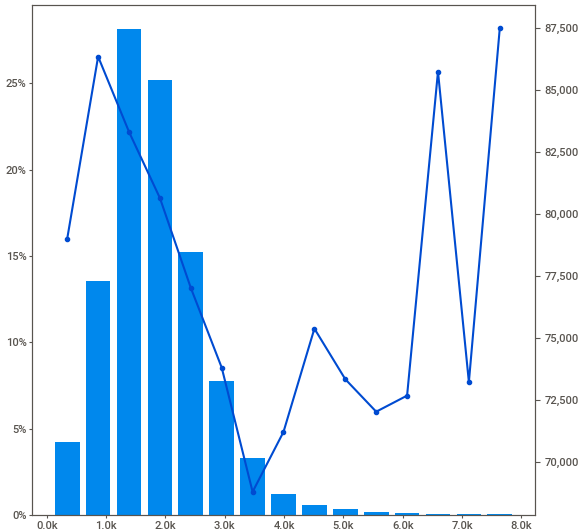
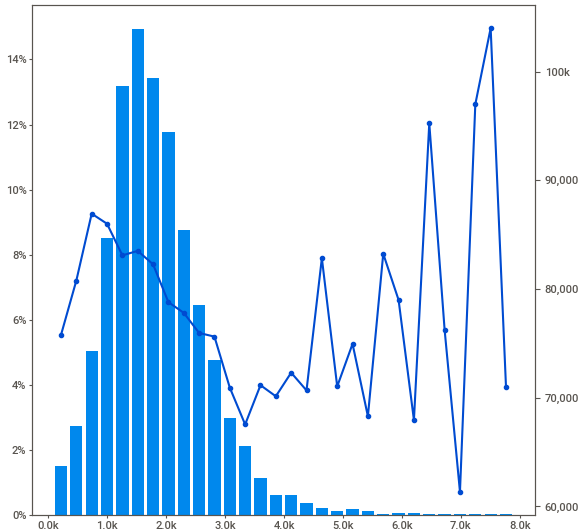
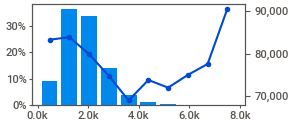
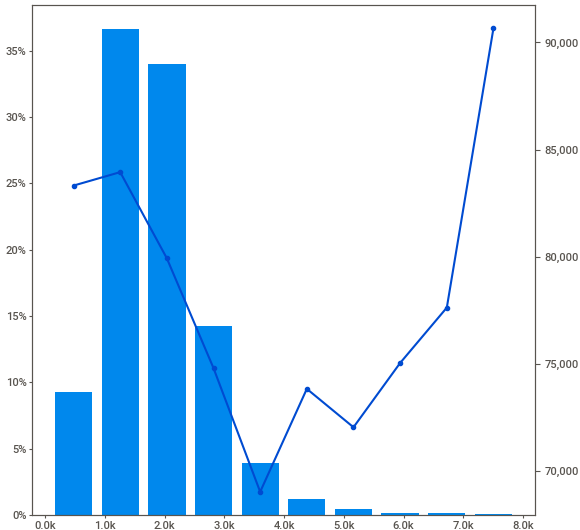
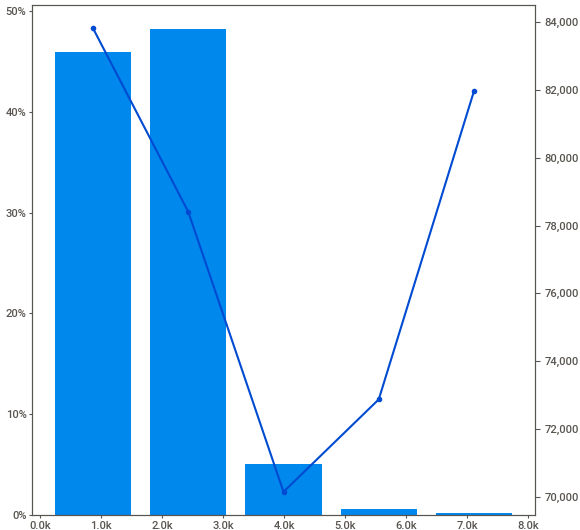
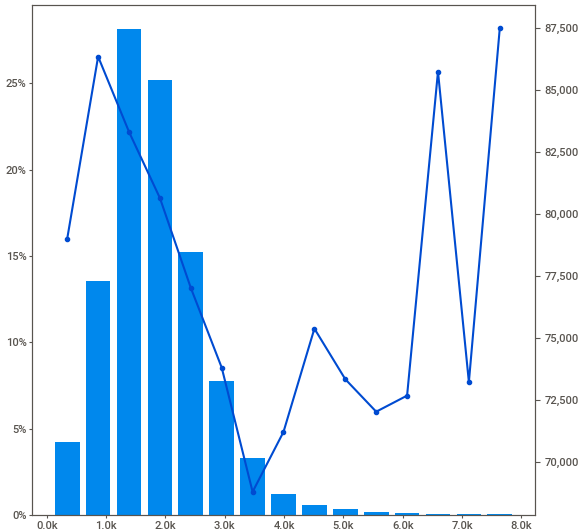
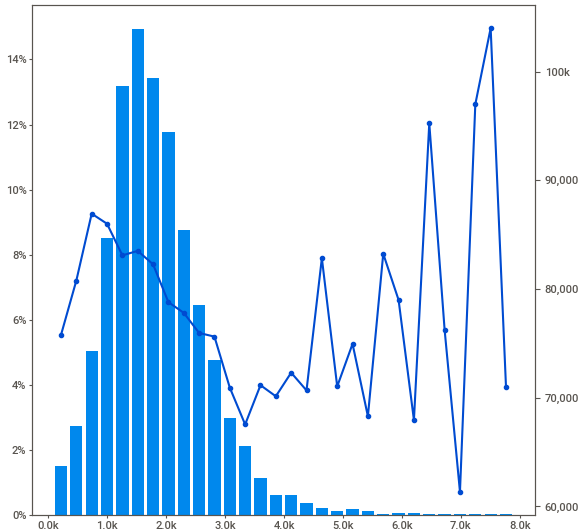
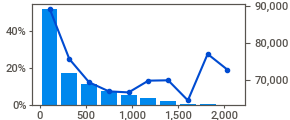
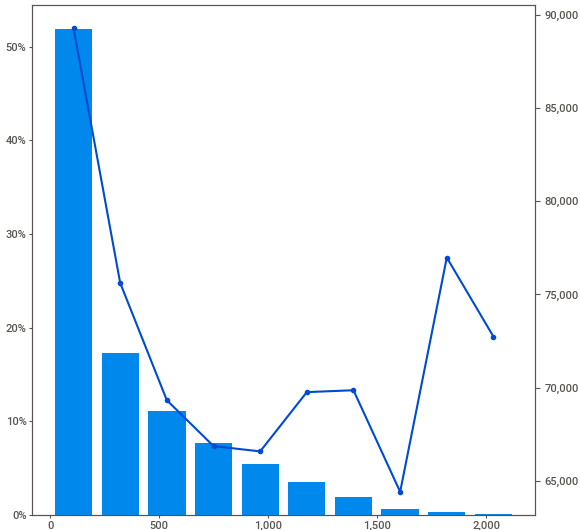
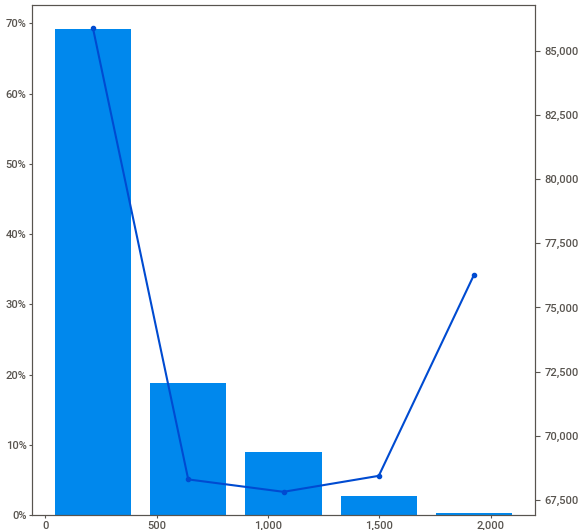
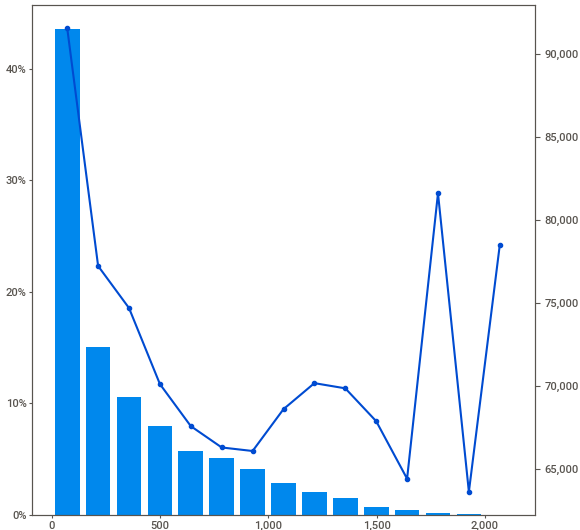
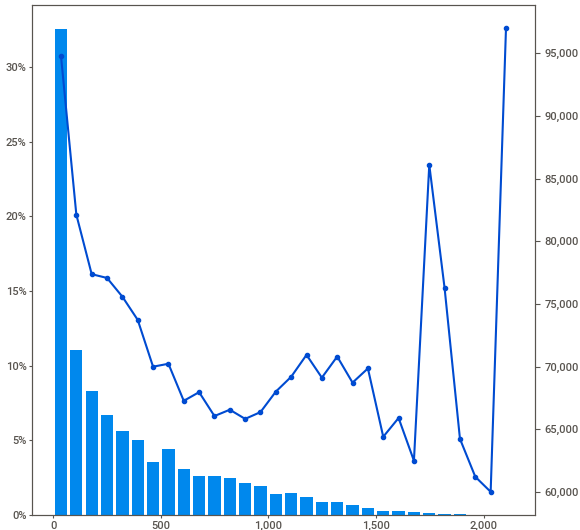
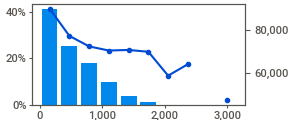
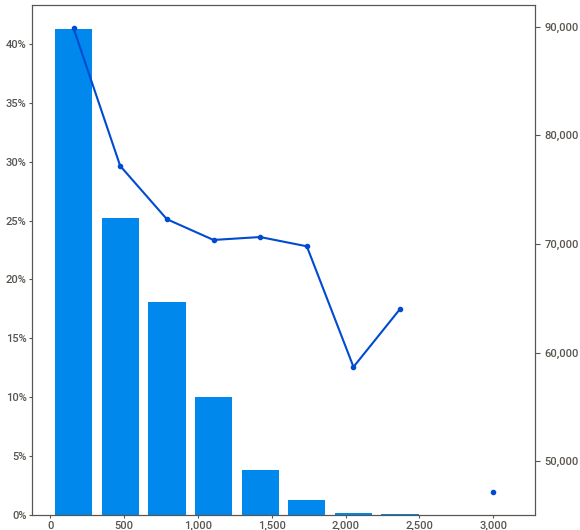
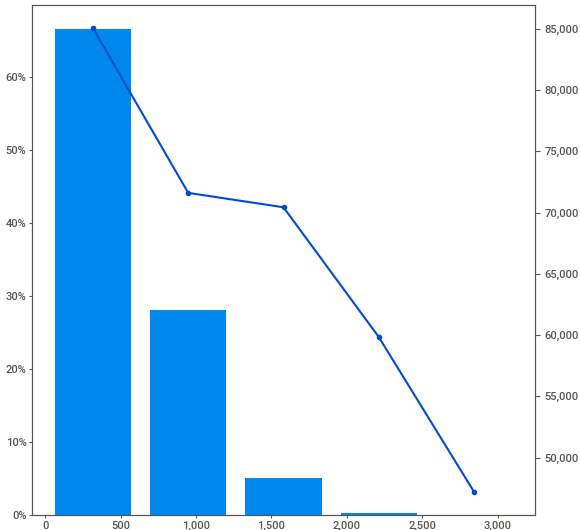
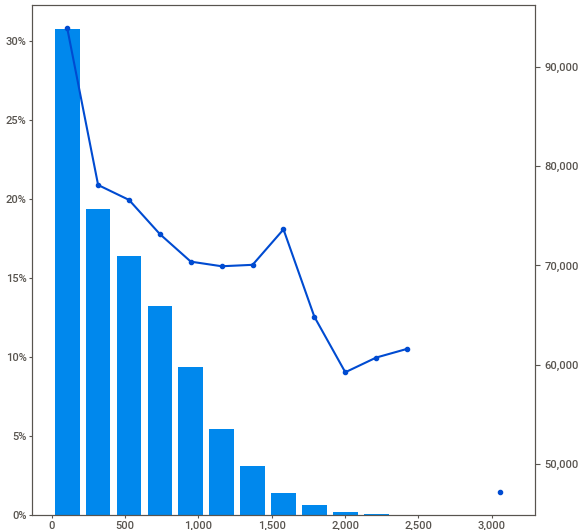
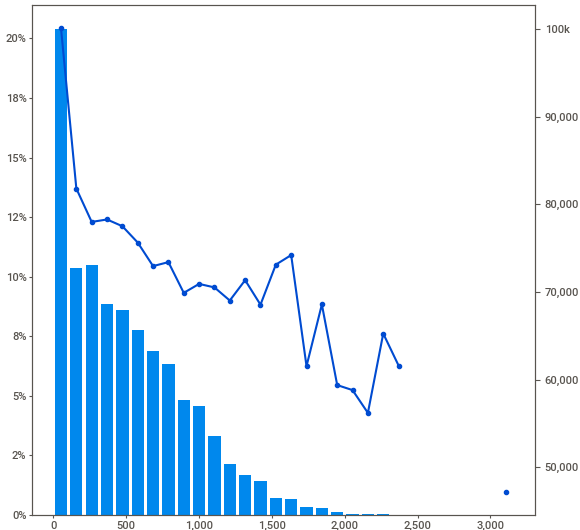
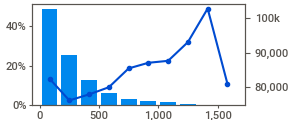
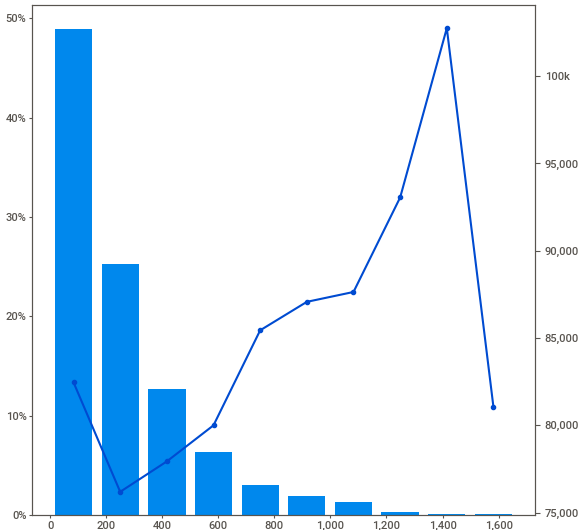
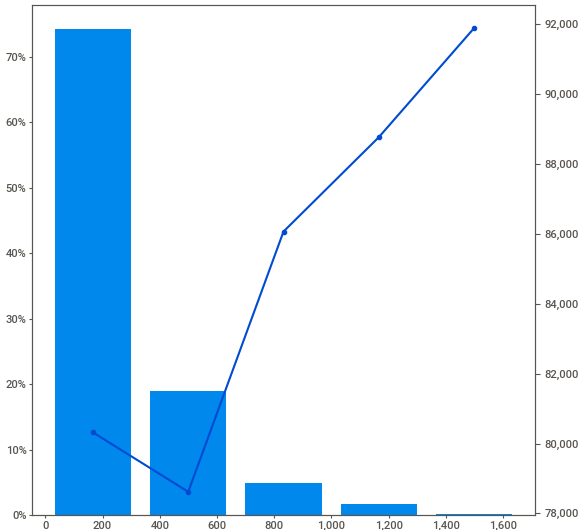
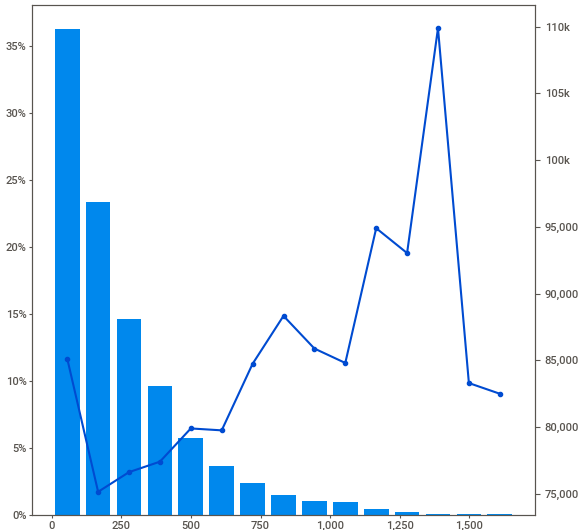
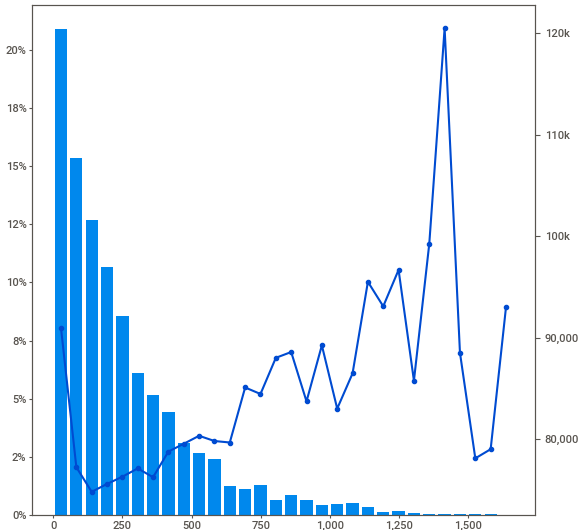
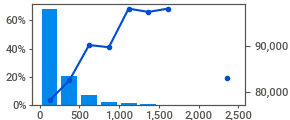
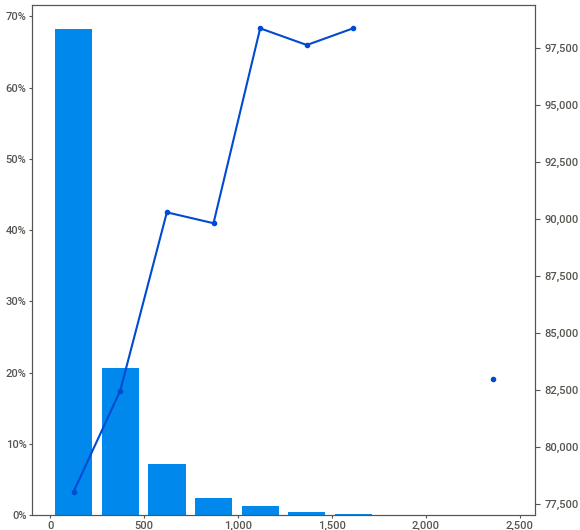
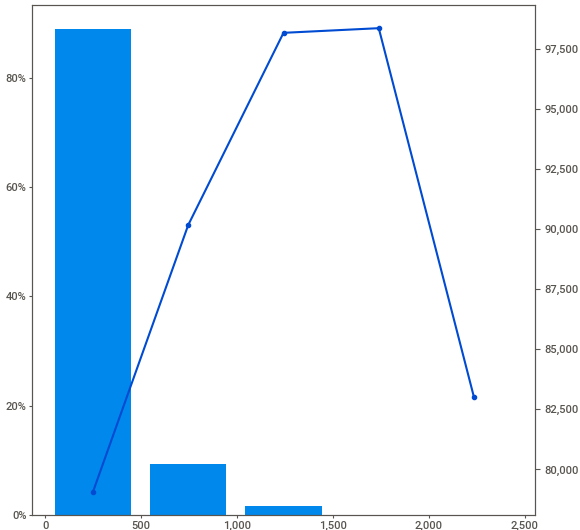
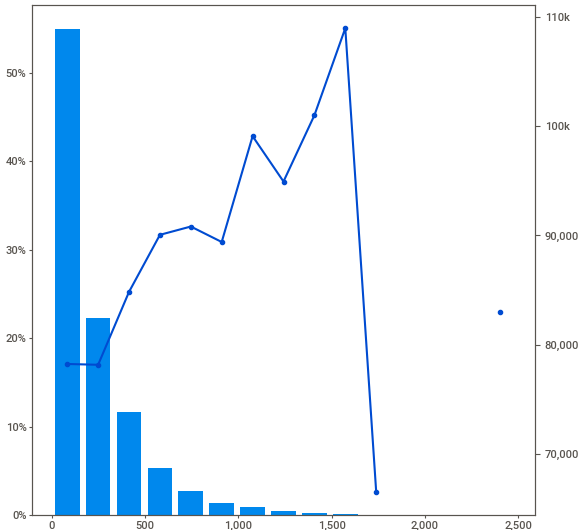
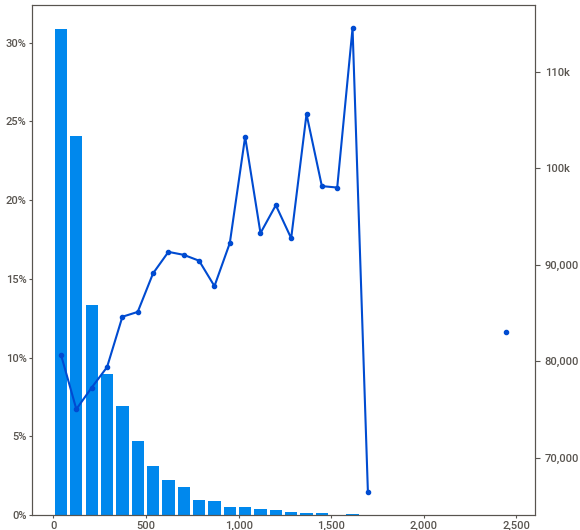
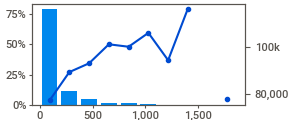
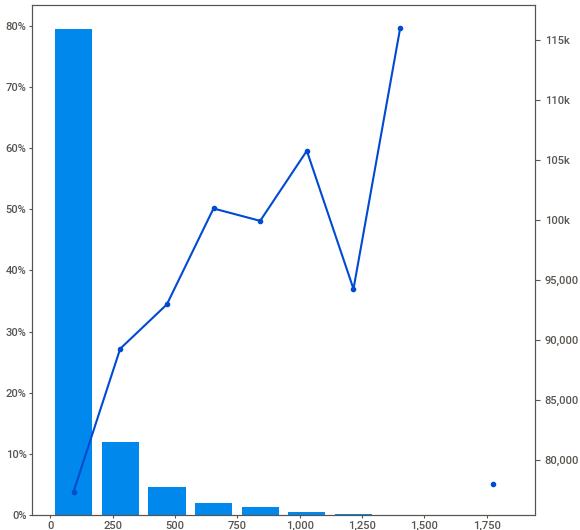
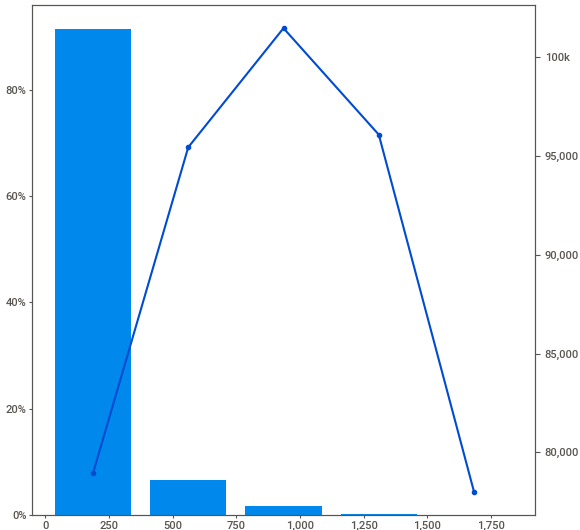
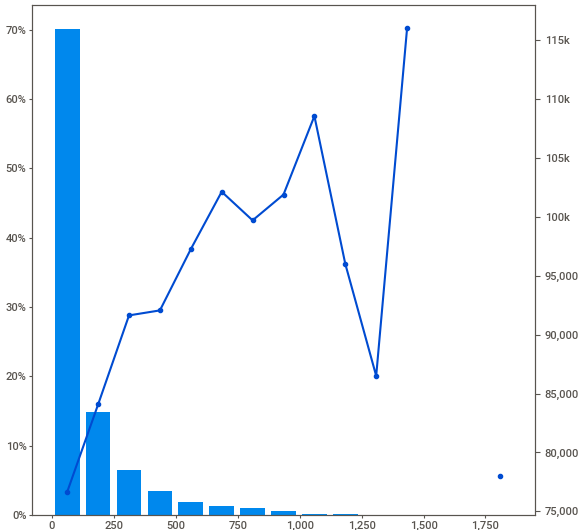
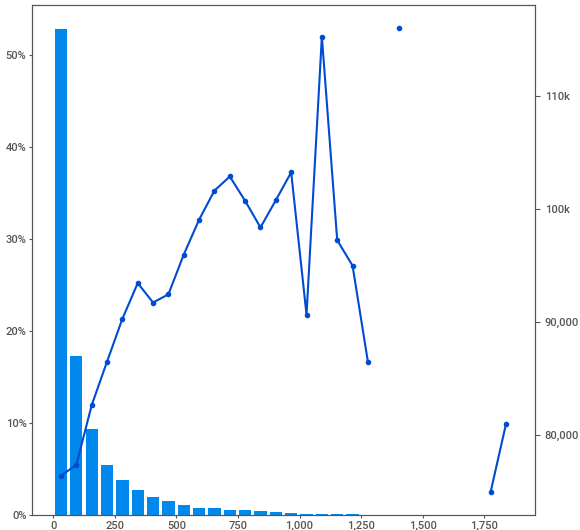
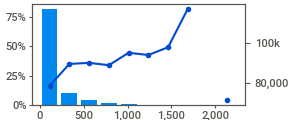
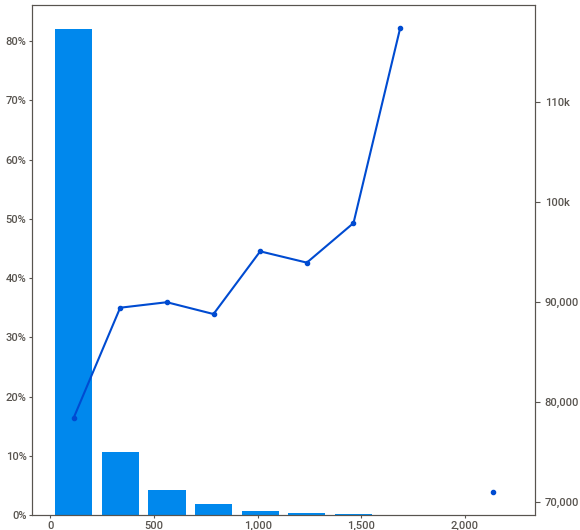
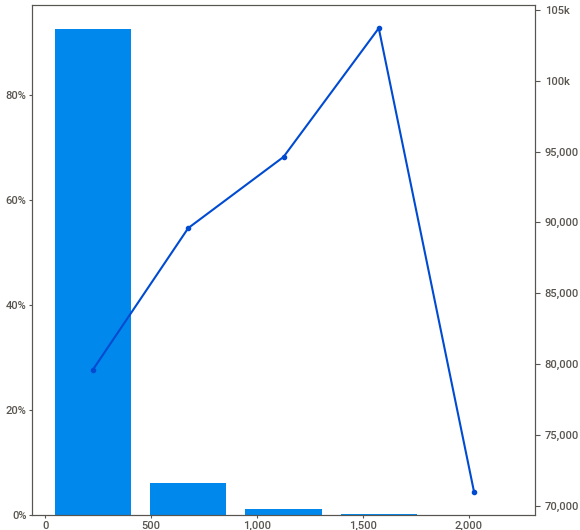
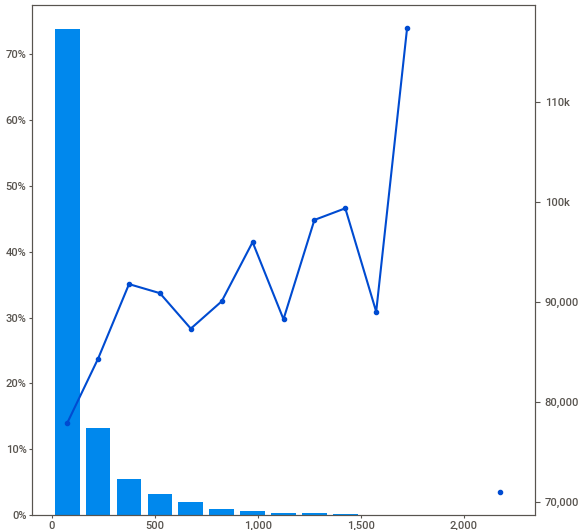
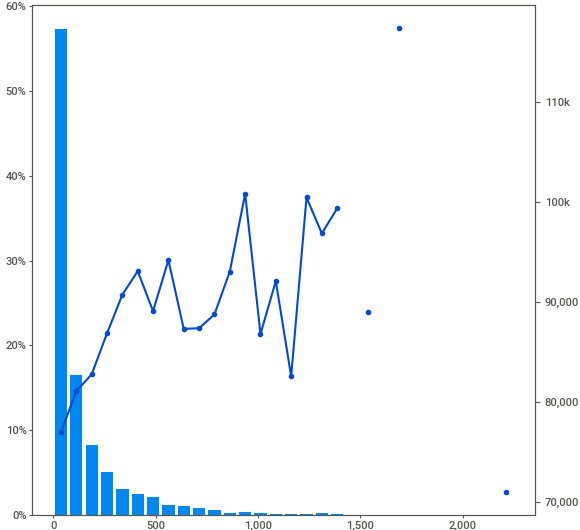
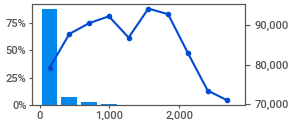
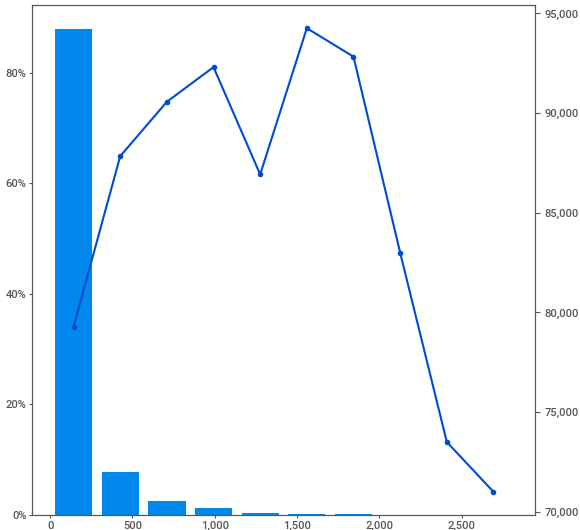
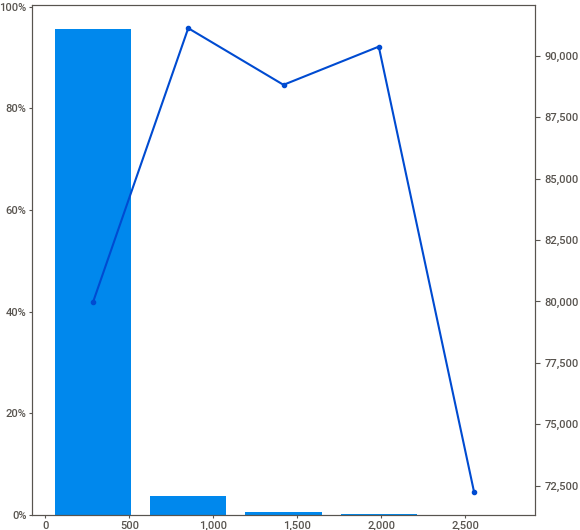
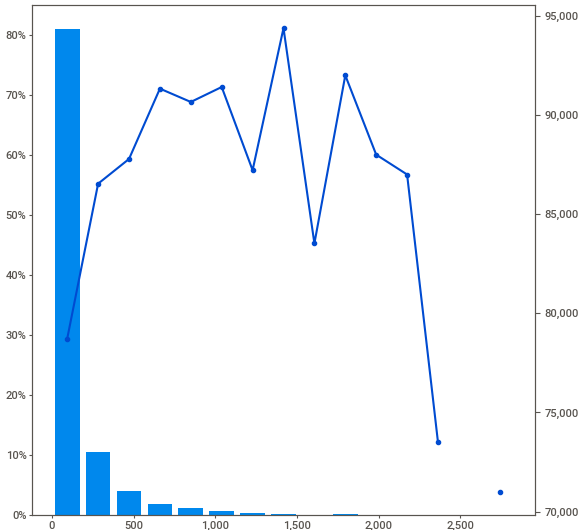
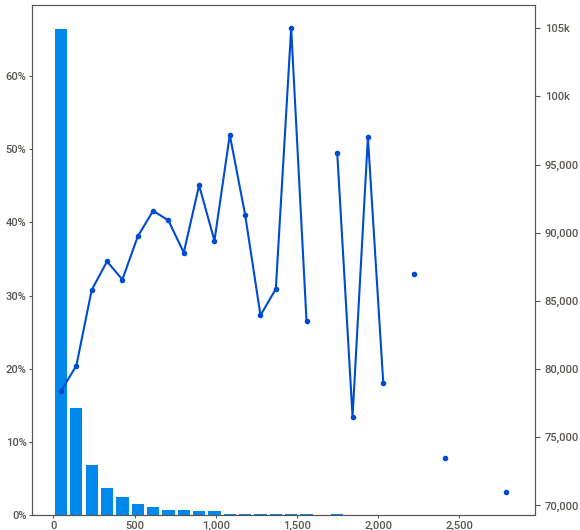
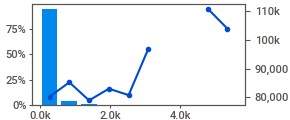
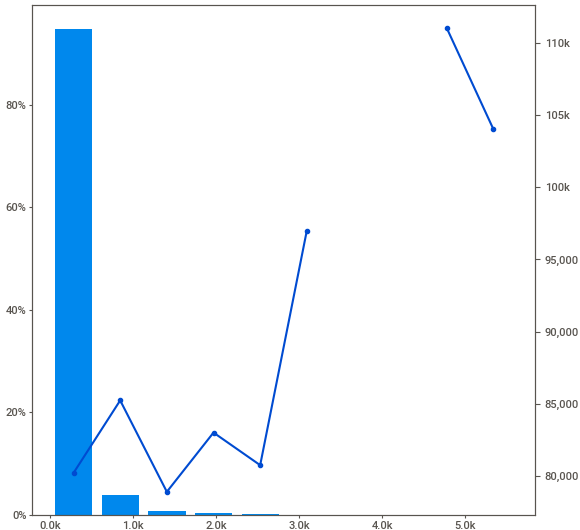
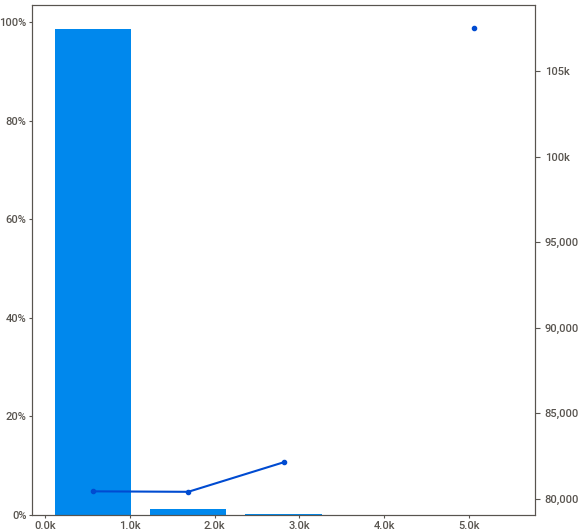
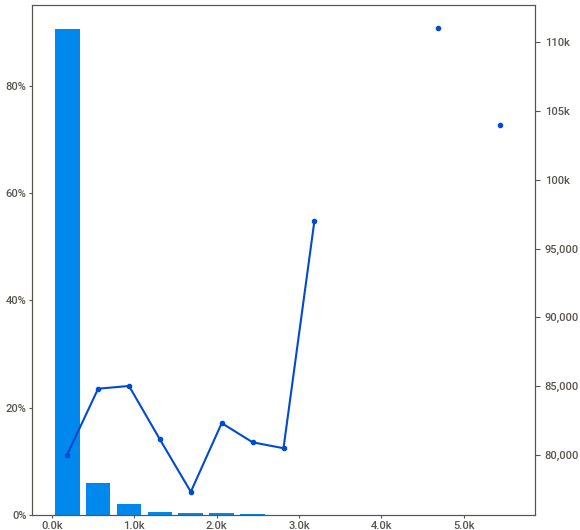
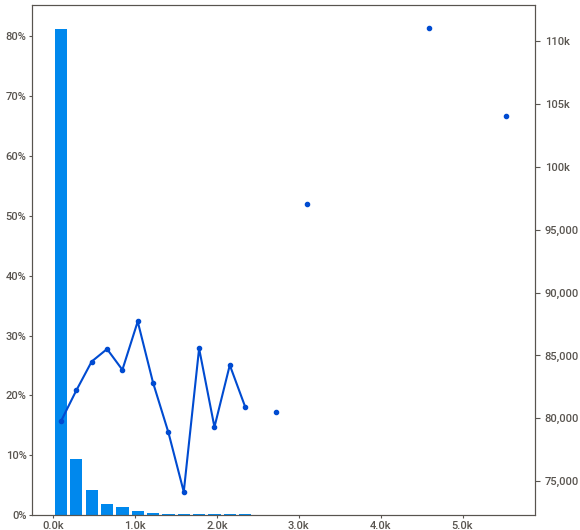
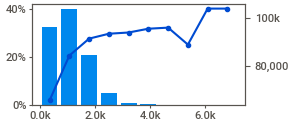
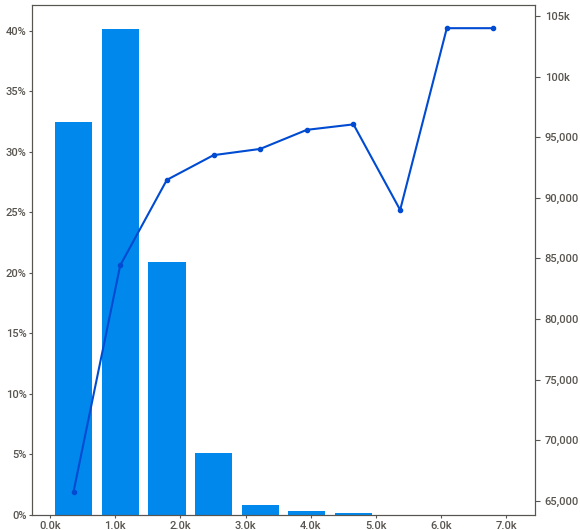
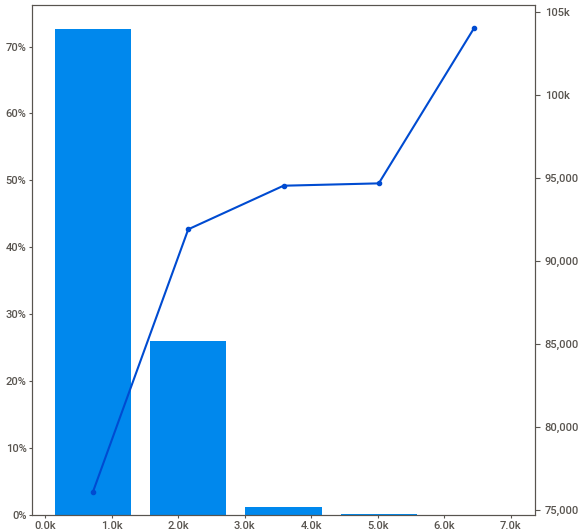
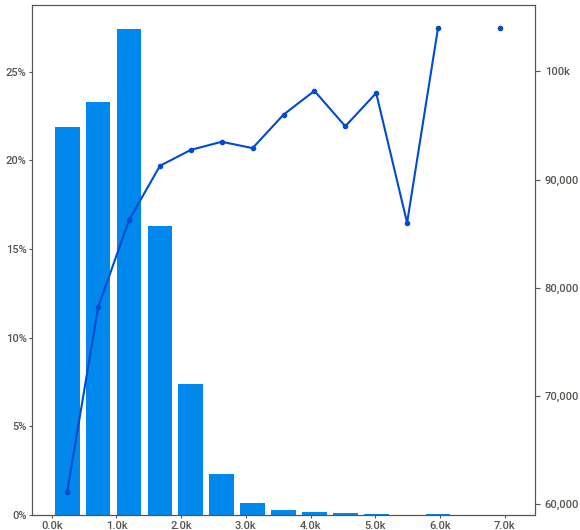
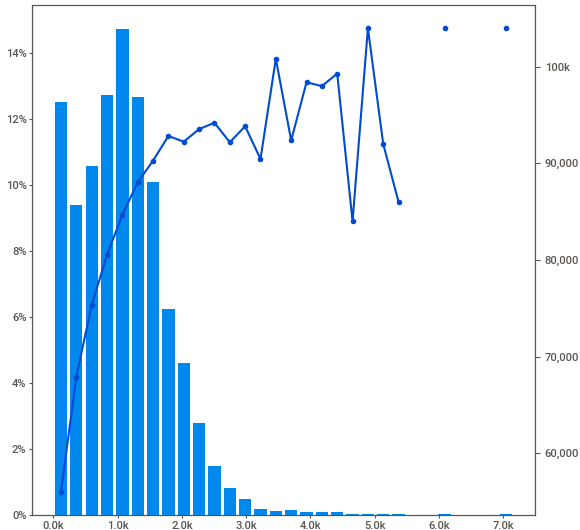
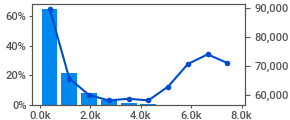
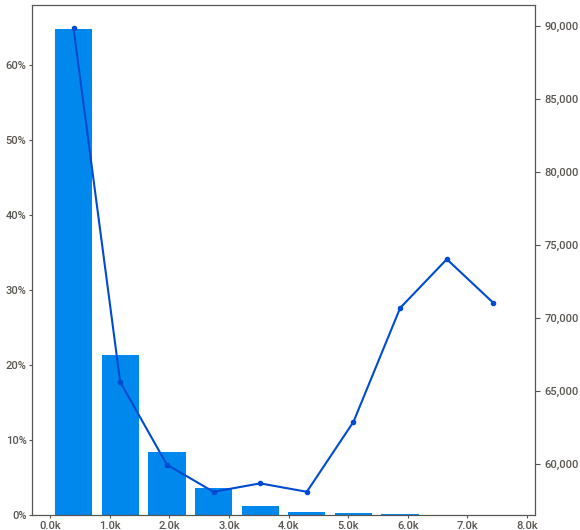
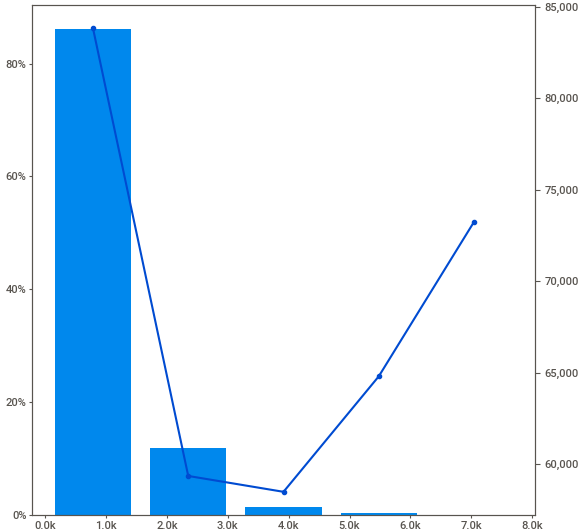
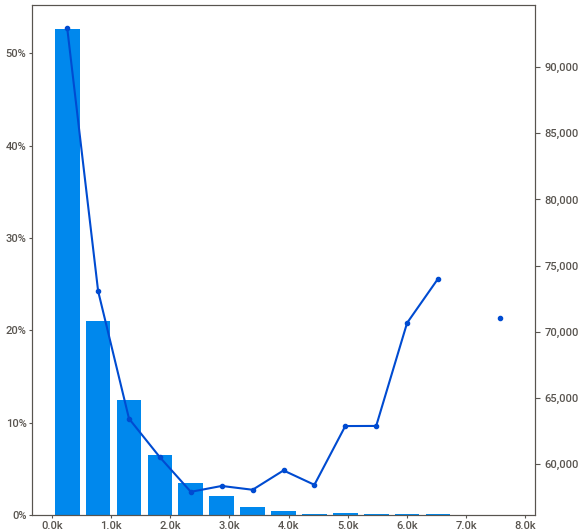
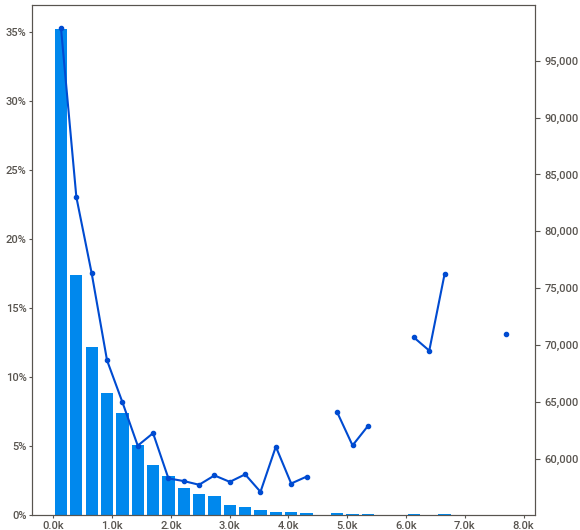
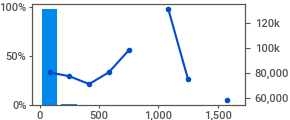
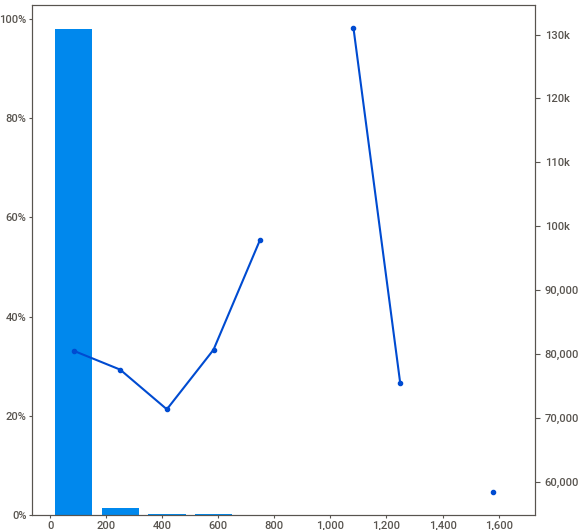
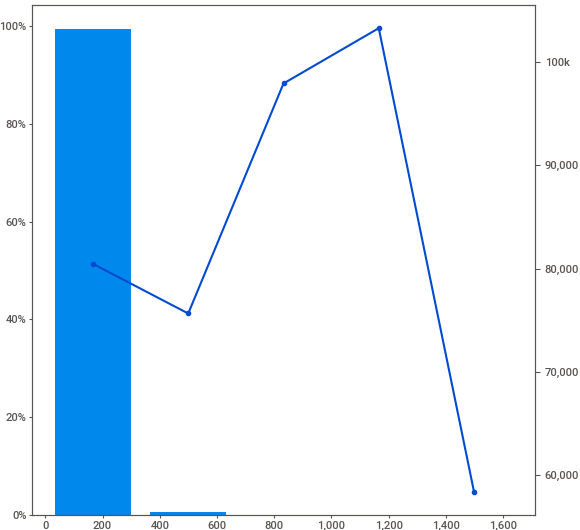
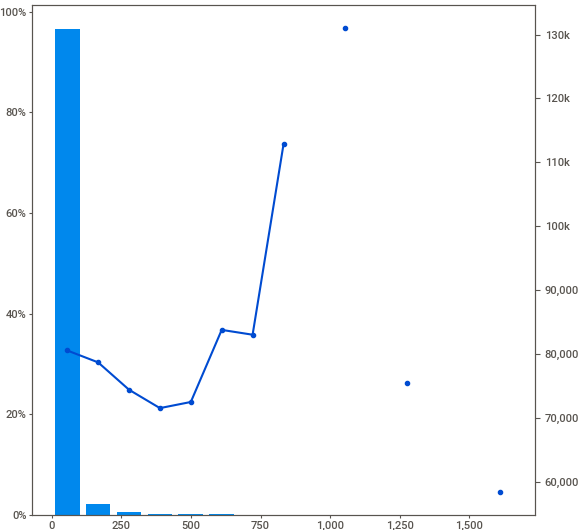
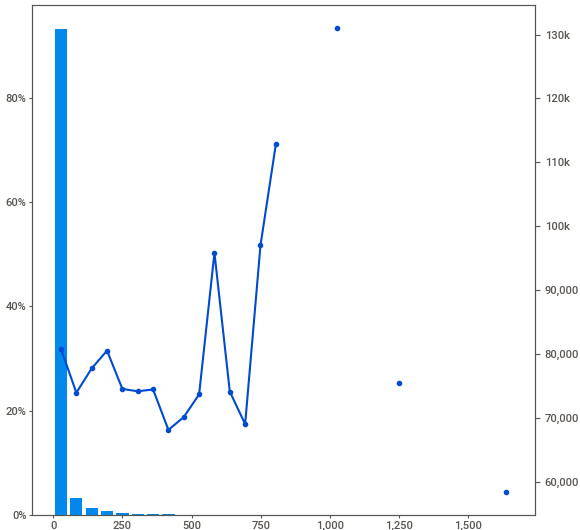
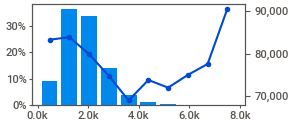
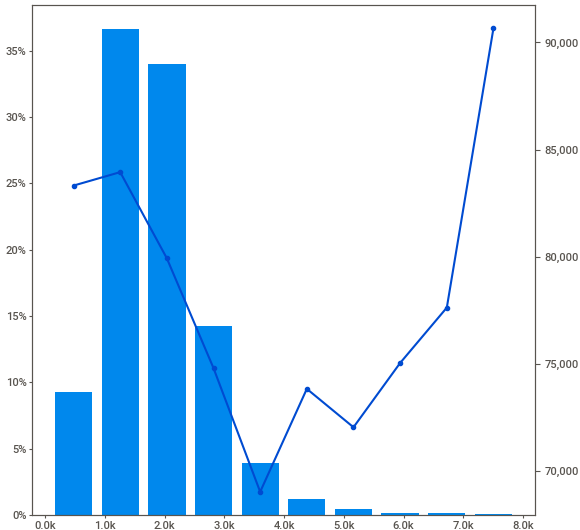
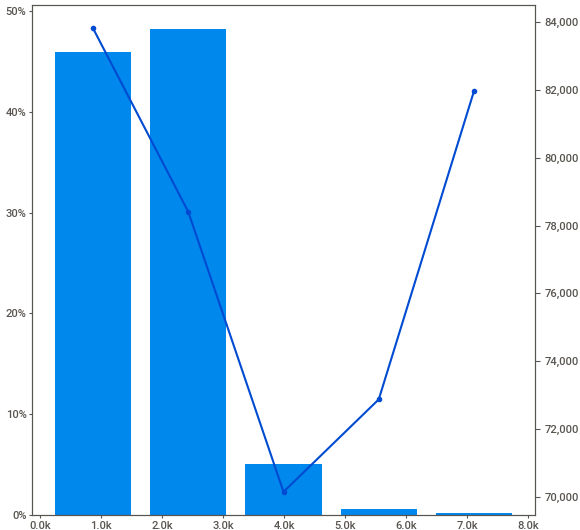
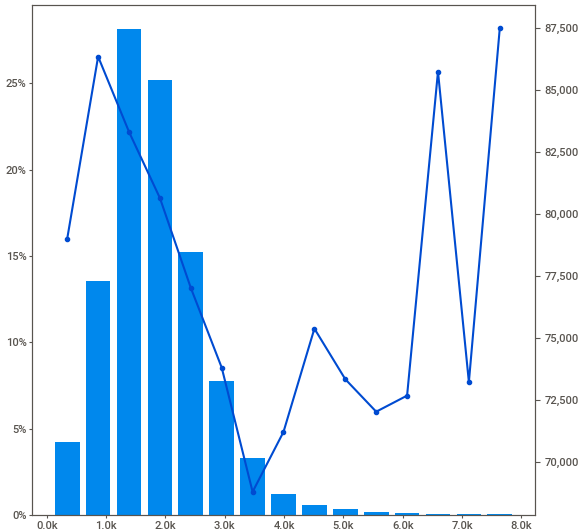
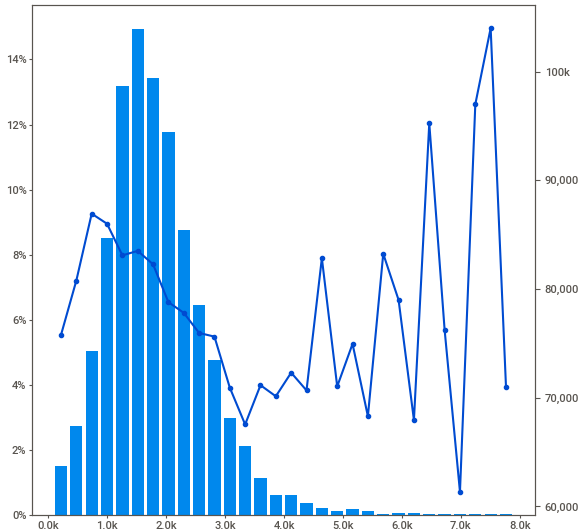
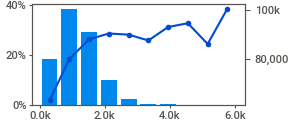
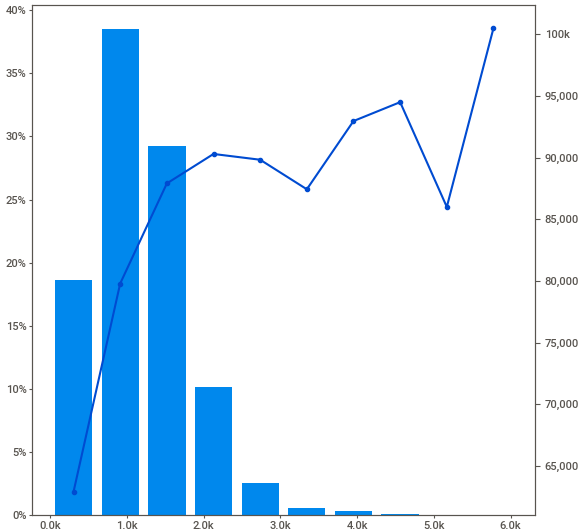
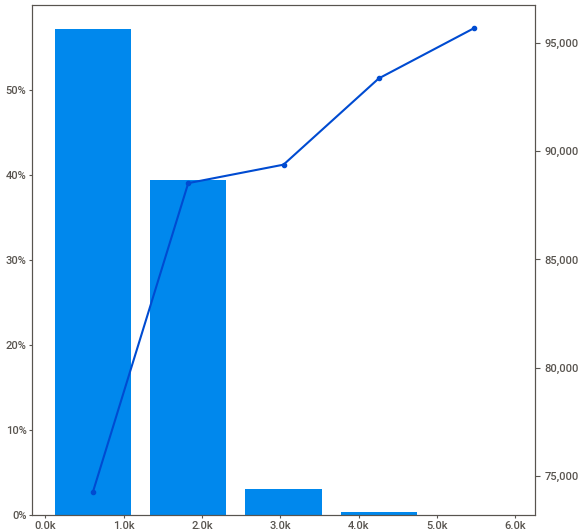
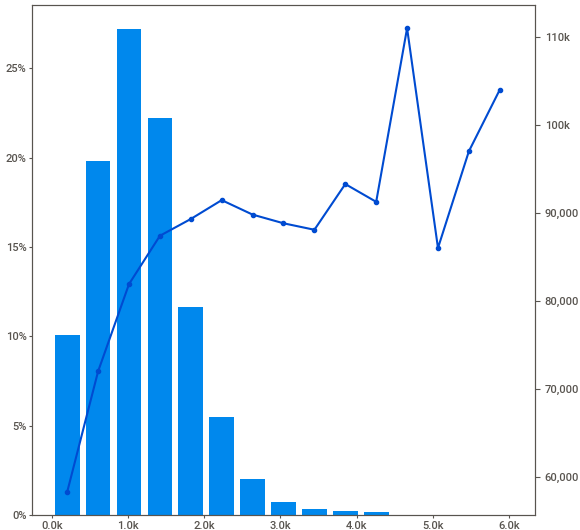
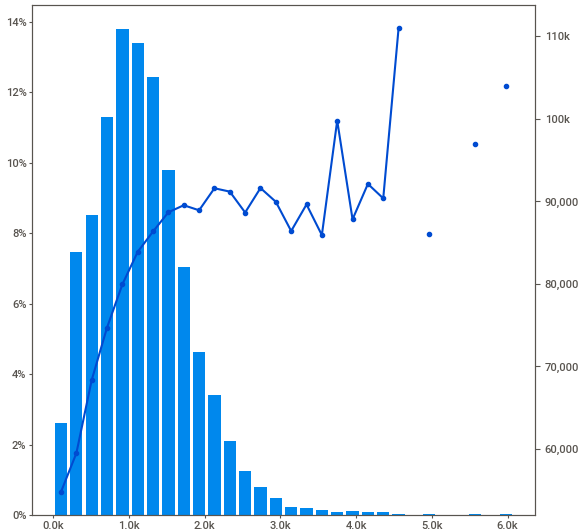
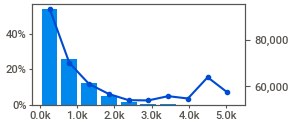
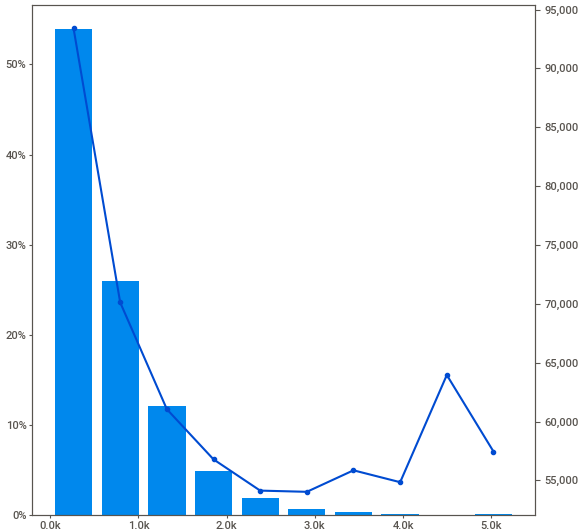
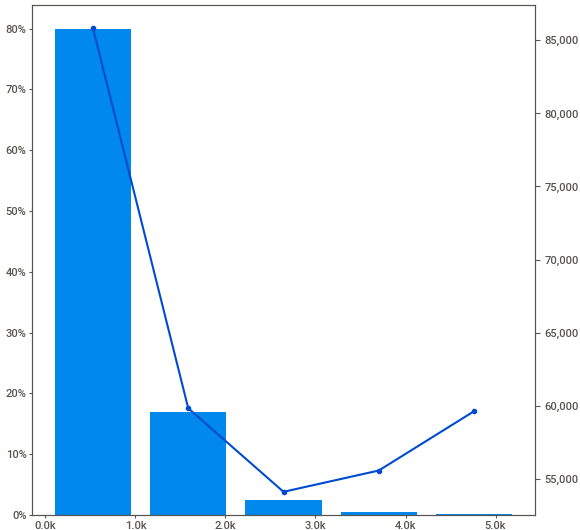
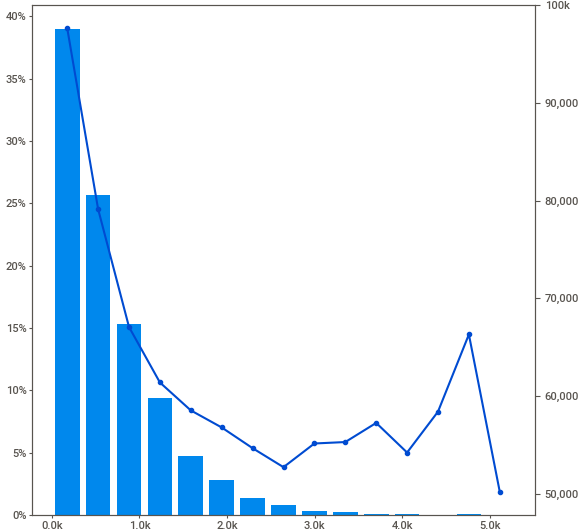
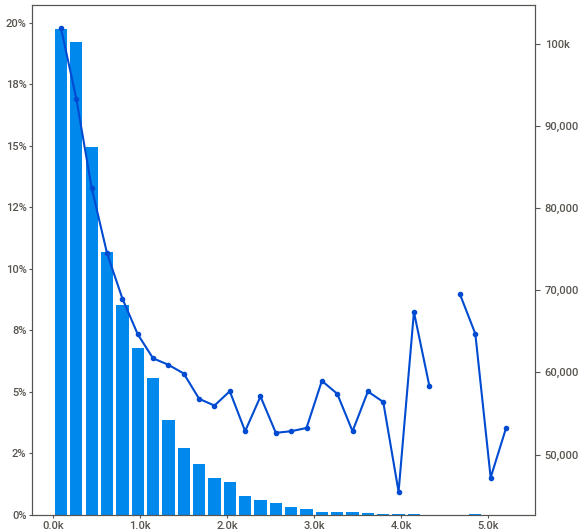
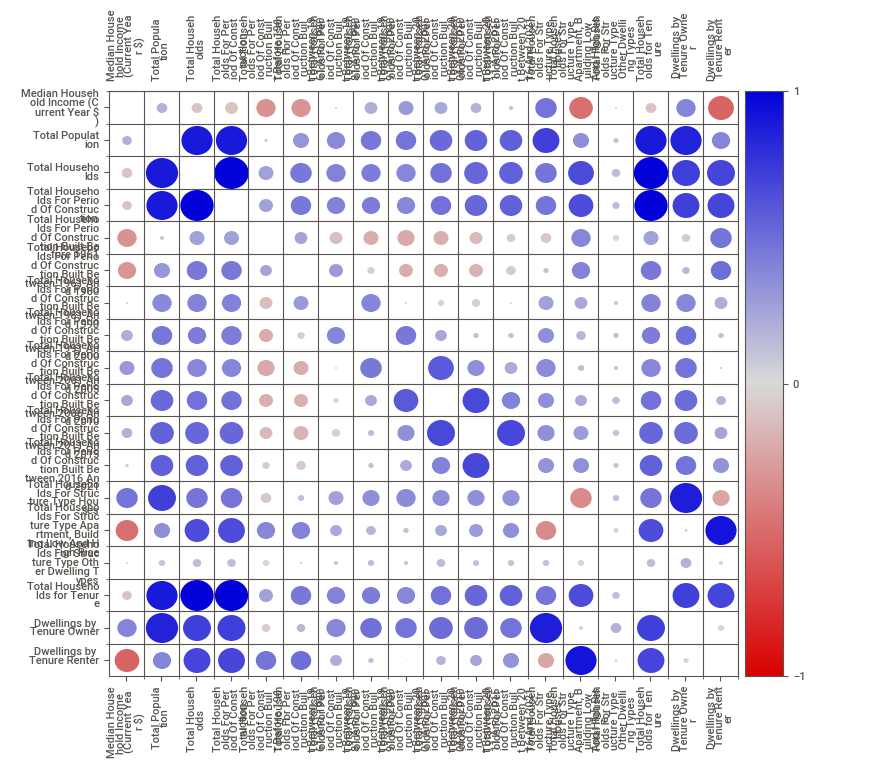
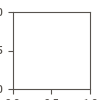

In [18]:
analyze_report.show_html('report.html')
import IPython
IPython.display.HTML('report.html')

From the EDA report generated above, we observe the following:


1.   Variables **Total Households**, **Total Households for Period Construction**, and **Total Households for Tenure** are perfectly correlated with each other. Therefore, we will remove **Total Households for Period Construction** and **Total Households for Tenure** as **Total Households** includes both.
2.   **Total Households** and **Total Population** is highly correlated (i.e. 0.88).
3.   **Dwellings by Tenure Renter** and **Total Households For Structure Type Apartment, Building Low And High Rise** are highly correlated (i.e. 0.92).
4.   **Dwellings by Tenure Owner** and **Total Households For Structure Type Houses** are hightly correlated (i.e. 0.86).
5.   Variables of the type **Total Households For Structure Type...** generally exhibited a higher association with the response variable (so perhaps we should only include one set of these two variables)
6.   Variables **Total Households**, **Total Population**, **Total Households for Period Construction**, and **Total Households for Tenure** showed no (or very trivial) association with the response variable.



